In [68]:
# Importing all the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [69]:
df = pd.read_csv("data/train.csv", index_col="Id")
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


Text(0.5, 1.0, 'Sale Price Distribution')

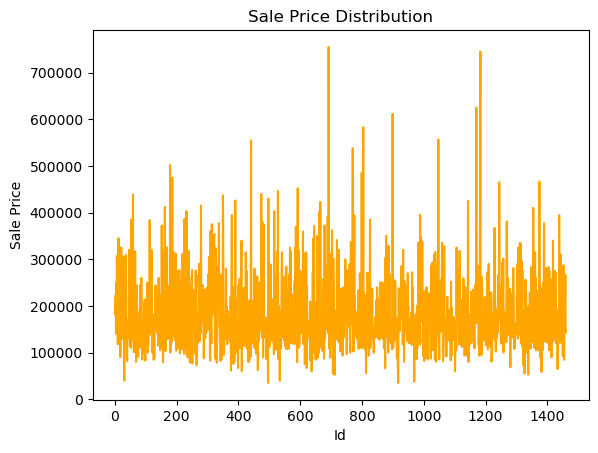

In [70]:
df["SalePrice"].plot(color = "orange")
plt.xlabel("Id")
plt.ylabel("Sale Price")
plt.title("Sale Price Distribution")

Text(0.5, 1.0, 'Sale Price VS Sale Condition')

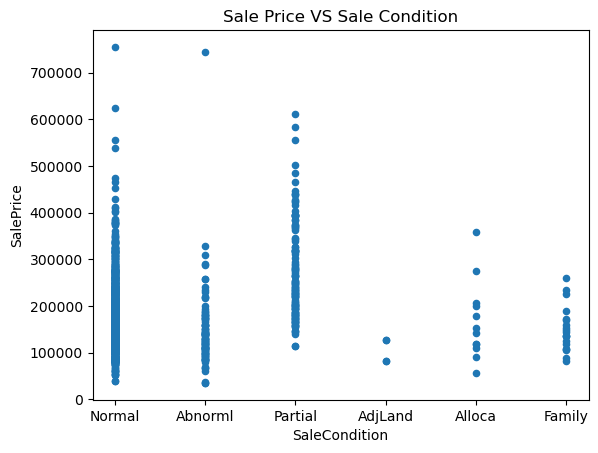

In [71]:
df.plot.scatter(x = "SaleCondition",
        y = "SalePrice")
plt.title("Sale Price VS Sale Condition")

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

In [73]:
df.isna().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

## Converting categorical features into numerical

## It is required to convert the non numerical features to numerical features and filling the missing values

The string elements can be converted to categorical elements using categorical codes

In [74]:
# Check for features which aren't numeric
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

MSZoning
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
PoolQC
Fence
MiscFeature
SaleType
SaleCondition


In [75]:
# Turning categorical variables into numbers
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Replacing the column with categorical codes
        df[label] = pd.Categorical(content).codes + 1

#### The missing values are encoder with 0 (initially missing values are encoded with -1)

In [76]:
df["LandContour"].value_counts()

LandContour
4    1311
1      63
2      50
3      36
Name: count, dtype: int64

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   int8   
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   int8   
 5   Alley          1460 non-null   int8   
 6   LotShape       1460 non-null   int8   
 7   LandContour    1460 non-null   int8   
 8   Utilities      1460 non-null   int8   
 9   LotConfig      1460 non-null   int8   
 10  LandSlope      1460 non-null   int8   
 11  Neighborhood   1460 non-null   int8   
 12  Condition1     1460 non-null   int8   
 13  Condition2     1460 non-null   int8   
 14  BldgType       1460 non-null   int8   
 15  HouseStyle     1460 non-null   int8   
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

In [78]:
df.isna().sum()[50:]

BedroomAbvGr      0
KitchenAbvGr      0
KitchenQual       0
TotRmsAbvGrd      0
Functional        0
Fireplaces        0
FireplaceQu       0
GarageType        0
GarageYrBlt      81
GarageFinish      0
GarageCars        0
GarageArea        0
GarageQual        0
GarageCond        0
PavedDrive        0
WoodDeckSF        0
OpenPorchSF       0
EnclosedPorch     0
3SsnPorch         0
ScreenPorch       0
PoolArea          0
PoolQC            0
Fence             0
MiscFeature       0
MiscVal           0
MoSold            0
YrSold            0
SaleType          0
SaleCondition     0
SalePrice         0
dtype: int64

**Note**: It is always recommended to fill the missing numerical features after splitting the data into training and test sets.

## Splitting the data

In [79]:
# Splitting into X and y
X = df.drop("SalePrice", axis = 1)
y = df["SalePrice"]
X.shape, y.shape

((1460, 79), (1460,))

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### Filling the missing values of X_train and X_test separately

The missing values in a column are replaced with the median of that feature.

In [81]:
# Creating an imputer function
def imputer(data):
    for label, content in data.items():
        if pd.api.types.is_numeric_dtype(content):
            if content.isna().sum():
                data[label] = content.fillna(content.median())
    return data

In [82]:
imputer(X_train)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
922,90,4,67.0,8777,2,0,4,4,1,5,...,0,0,0,1,0,0,9,2008,9,5
521,190,4,60.0,10800,2,1,4,4,1,5,...,0,0,0,0,0,0,8,2008,9,5
402,20,4,65.0,8767,2,0,1,4,1,5,...,0,0,0,0,0,0,7,2006,7,6
281,60,4,82.0,11287,2,0,4,4,1,5,...,0,0,0,0,0,0,1,2007,9,5
1402,60,4,62.0,7415,2,0,1,4,1,5,...,0,0,0,0,0,0,4,2008,9,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716,20,4,78.0,10140,2,0,4,4,1,5,...,0,0,0,3,0,0,8,2009,9,5
906,20,4,80.0,9920,2,0,4,4,1,5,...,0,0,0,3,0,0,2,2010,9,5
1097,70,5,60.0,6882,2,0,4,4,1,5,...,0,0,0,0,0,0,3,2007,9,5


In [83]:
imputer(X_test)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
259,60,4,80.0,12435,2,0,4,4,1,5,...,0,0,0,0,0,0,5,2008,9,5
268,75,4,60.0,8400,2,0,4,1,1,5,...,0,0,0,0,0,0,7,2008,9,5
289,20,4,70.0,9819,2,0,1,4,1,5,...,0,0,0,3,0,0,2,2010,9,5
650,180,5,21.0,1936,2,0,4,4,1,5,...,0,0,0,3,0,0,12,2007,9,5
1234,20,4,70.0,12160,2,0,1,4,1,5,...,0,0,0,3,0,0,5,2010,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,45,4,55.0,5500,2,0,4,4,1,5,...,0,0,0,3,0,0,4,2007,9,5
48,20,2,84.0,11096,2,0,4,4,1,5,...,0,0,0,0,0,0,7,2007,9,5
1433,30,4,60.0,10800,2,1,4,4,1,5,...,0,0,0,0,0,0,8,2007,9,5


# Modelling

Using `RandomForestRegressor()` and `XGBRegressor()` for predicting the prices. For evaluating the model, I have used mean absolute error as the evaluation parameter.

`score` and `MAE` are the R2 score and mean absolute error evaluated on the manually split test and train sets, whereas `cv_score` and `cv_mae` are the R2 score and mean absolute error respectively, evaluated on the cross-validated data.

In [84]:
# Creating an evaluation function
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

def show_scores(model):
    y_preds = model.predict(X_test)
    ev = {"score":model.score(X_test, y_test),
          "MAE": mean_absolute_error(y_test, y_preds),
          "cv_score": cross_val_score(model, X, y, cv=5).mean(),
          "cv_mae": (-1 * cross_val_score(model, X, y, cv=5, scoring="neg_mean_absolute_error")).mean()}
    return ev

In [85]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [86]:
show_scores(xgb_model)

{'score': 0.8594001077686466,
 'MAE': 16789.440229023974,
 'cv_score': 0.8643212272293477,
 'cv_mae': 17654.96410530822}

In [87]:
from sklearn.ensemble import RandomForestRegressor
# Instantiating the Random Forest model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [88]:
show_scores(rf_model)

{'score': 0.8950795935946665,
 'MAE': 16495.212465753426,
 'cv_score': 0.8585666008344625,
 'cv_mae': 17624.63701369863}

### The cross-validated metrics for XGBRegressor model are slightly better than that of RandomForestRegressor model. So it is better to move forward with the XGBRegressor model

**Trying to make the XGB model better**

In [89]:
# Creating a model tuning function
def metrics(n_estimators, learning_rate):
    model = XGBRegressor(n_estimators=n_estimators,
                         learning_rate=learning_rate,
                         random_state=1,
                         n_jobs=4)
    scores = -1 * cross_val_score(model, X, y, cv = 5, scoring="neg_mean_absolute_error")
    return scores.mean()

In [90]:
params = {}
for i in range(8, 13):
    for j in range(3):
        params[(100*i, 0.04 + 0.01*j)] = metrics(100*i, 0.04 + 0.01*j)
params

{(800, 0.04): 16609.100660851884,
 (800, 0.05): 16646.023895012844,
 (800, 0.06): 16512.272316459763,
 (900, 0.04): 16611.421939212327,
 (900, 0.05): 16646.757801797947,
 (900, 0.06): 16515.666256421235,
 (1000, 0.04): 16612.89022902397,
 (1000, 0.05): 16646.462885273973,
 (1000, 0.06): 16515.240124678938,
 (1100, 0.04): 16613.763802975172,
 (1100, 0.05): 16645.965140732023,
 (1100, 0.06): 16515.185974957192,
 (1200, 0.04): 16616.161207726884,
 (1200, 0.05): 16647.695489083904,
 (1200, 0.06): 16515.129928296235}

In [91]:
min_mae = math.inf
for para, mae in params.items():
    if mae < min_mae:
        min_mae = mae
        p = para

result = {"n_estimators": p[0],
          "learning_rate": p[1],
          "MAE": min_mae}
print(f"The best parameters are: {result}")

The best parameters are: {'n_estimators': 800, 'learning_rate': 0.06, 'MAE': 16512.272316459763}


In [92]:
# Testing the best model
best_model = XGBRegressor(n_estimators = 800,
                          learning_rate = 0.06,
                          random_state=1,
                          n_jobs=4)
best_model.fit(X, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.06, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=800, n_jobs=4,
             num_parallel_tree=None, random_state=1, ...)

In [93]:
cross_val_score(best_model, X, y, cv=5).mean()

0.8786298204752818

# Predicting the PriceSales for the given test data

### Preprocessing the test data

In [94]:
test = pd.read_csv("data/test.csv", index_col = "Id")
test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml


In [95]:
# Turning categorical variables into numbers
for label, content in test.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Replacing the column with categorical codes
        test[label] = pd.Categorical(content).codes + 1

In [96]:
imputer(test)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,3,80.0,11622,2,0,4,4,1,5,...,120,0,0,3,0,0,6,2010,9,5
1462,20,4,81.0,14267,2,0,1,4,1,1,...,0,0,0,0,1,12500,6,2010,9,5
1463,60,4,74.0,13830,2,0,1,4,1,5,...,0,0,0,3,0,0,3,2010,9,5
1464,60,4,78.0,9978,2,0,1,4,1,5,...,0,0,0,0,0,0,6,2010,9,5
1465,120,4,43.0,5005,2,0,1,2,1,5,...,144,0,0,0,0,0,1,2010,9,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,5,21.0,1936,2,0,4,4,1,5,...,0,0,0,0,0,0,6,2006,9,5
2916,160,5,21.0,1894,2,0,4,4,1,5,...,0,0,0,0,0,0,4,2006,9,1
2917,20,4,160.0,20000,2,0,4,4,1,5,...,0,0,0,0,0,0,9,2006,9,1


In [97]:
preds = best_model.predict(test)
preds

array([126617.  , 159605.11, 183007.56, ..., 163161.56, 116060.29,
       209326.66], dtype=float32)

In [98]:
output = pd.DataFrame({"Id": test.index, "SalePrice": preds})
output

,Id,SalePrice
0,1461,126617.000000
1,1462,159605.109375
2,1463,183007.562500
3,1464,186731.078125
4,1465,201285.750000
...,...,...
1454,2915,79254.335938
1455,2916,80866.421875
1456,2917,163161.562500
1457,2918,116060.289062


In [99]:
# Exporting the file
output.to_csv("data/Output.csv", index=False)

In [100]:
# Getting the feature importance of the model
best_model.feature_importances_

array([4.5937757e-04, 4.8255329e-03, 1.0331456e-03, 2.3644310e-03,
       0.0000000e+00, 1.3270334e-03, 3.5450733e-03, 1.0228957e-02,
       0.0000000e+00, 3.8560361e-04, 2.6654785e-03, 5.1346850e-03,
       8.6550805e-04, 1.7328779e-04, 1.1425413e-03, 1.0522810e-03,
       5.2087736e-01, 5.3647547e-03, 4.8076184e-03, 4.0162574e-03,
       7.0369884e-04, 7.1200432e-04, 1.6350490e-03, 1.0383859e-03,
       2.0745103e-03, 7.5229426e-04, 1.1196087e-02, 1.3377375e-03,
       3.8220166e-04, 2.2128833e-02, 4.9731194e-04, 2.3023232e-03,
       1.1438729e-03, 8.2961246e-03, 4.5327161e-04, 9.3185273e-04,
       8.4494561e-04, 1.9761121e-02, 2.2114338e-05, 7.5576507e-04,
       3.6169201e-02, 1.1847669e-04, 8.1809489e-03, 1.8883133e-02,
       5.7886904e-03, 3.4050766e-02, 6.0566352e-03, 4.9405557e-04,
       1.6048390e-02, 2.2681693e-03, 2.0411455e-03, 8.6072862e-02,
       1.3855608e-02, 1.5429077e-02, 6.8283658e-03, 6.4086295e-03,
       4.3508429e-03, 1.2102681e-02, 2.0540855e-03, 1.7189994e

In [101]:
feat = pd.DataFrame({"Features": X.columns,
                     "Feature Importances": best_model.feature_importances_}).sort_values(by = "Feature Importances", ascending=False)

In [102]:
feat.reset_index(drop=True, inplace=True)
feat

,Features,Feature Importances
0,OverallQual,0.520877
1,KitchenAbvGr,0.086073
2,GarageCars,0.052471
3,CentralAir,0.036169
4,GrLivArea,0.034051
...,...,...
74,Electrical,0.000118
75,Heating,0.000022
76,PoolQC,0.000010
77,Utilities,0.000000


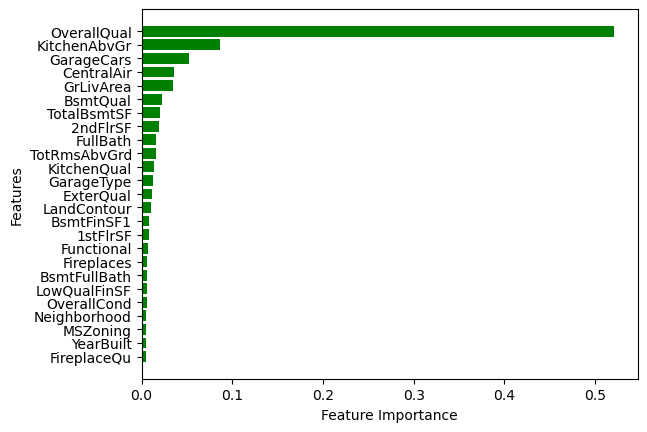

In [103]:
# Plotting the feature importances
fig, ax = plt.subplots()
ax.barh(feat["Features"][:25], feat["Feature Importances"][:25], color = "green")
ax.set_xlabel("Feature Importance")
ax.set_ylabel("Features")
ax.invert_yaxis()